In [7]:
import pandas as pd

# CSV ファイルを読み込む
df = pd.read_csv("Updated_Parking_Data.csv")

# 日時データを datetime 型に変換
df['date_time'] = pd.to_datetime(df['date_time'])

# Prophet のフォーマットに変更
df_prophet = df.rename(columns={'date_time': 'ds', 'usage': 'y'})[['ds', 'y']]

# データの確認
print(df_prophet.head())


                   ds   y
0 2024-10-01 00:00:00  55
1 2024-10-01 01:00:00  63
2 2024-10-01 02:00:00  68
3 2024-10-01 03:00:00  72
4 2024-10-01 04:00:00  77


In [8]:
from prophet import Prophet

# Prophet モデルのインスタンスを作成
model = Prophet()

# モデルの学習（データをフィット）
model.fit(df_prophet)

print("モデルの学習が完了しました！")

16:54:43 - cmdstanpy - INFO - Chain [1] start processing
16:54:43 - cmdstanpy - INFO - Chain [1] done processing


モデルの学習が完了しました！


In [9]:
# 未来の予測期間を設定（例: 30日間、1時間ごと）
future = model.make_future_dataframe(periods=7 * 24, freq='h')

# 未来データの確認
print(future.tail())

                      ds
1627 2024-12-07 19:00:00
1628 2024-12-07 20:00:00
1629 2024-12-07 21:00:00
1630 2024-12-07 22:00:00
1631 2024-12-07 23:00:00


In [10]:
# 予測の実行
forecast = model.predict(future)

# 予測結果の確認
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1627,2024-12-07 19:00:00,43.736272,24.852775,63.244500
1628,2024-12-07 20:00:00,27.436918,7.811235,47.299441
1629,2024-12-07 21:00:00,19.650571,-0.415707,39.319138
1630,2024-12-07 22:00:00,20.129168,1.144827,41.173861
1631,2024-12-07 23:00:00,25.092402,4.632790,44.201347


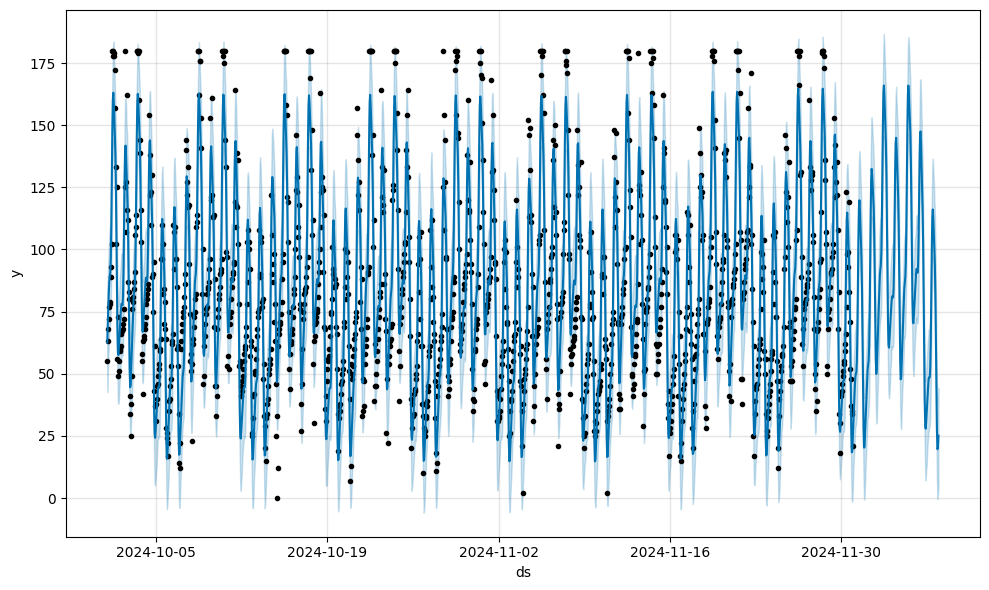

In [11]:
import matplotlib.pyplot as plt

# 予測結果のプロット
fig = model.plot(forecast)
plt.show()

In [12]:
import pandas as pd

# One-Hot Encoding を適用
df = pd.get_dummies(df, columns=['weather', 'event'])

# Prophet のデータ形式に変換
df_prophet = df.rename(columns={'date_time': 'ds', 'usage': 'y'})

# データ確認
print(df_prophet.head())


                   ds   y  weather_晴れ  weather_曇り  weather_雨  event_あり  \
0 2024-10-01 00:00:00  55        True       False      False     False   
1 2024-10-01 01:00:00  63        True       False      False     False   
2 2024-10-01 02:00:00  68        True       False      False      True   
3 2024-10-01 03:00:00  72       False        True      False      True   
4 2024-10-01 04:00:00  77        True       False      False     False   

   event_なし  
0      True  
1      True  
2     False  
3     False  
4      True  


In [13]:
from prophet import Prophet

# Prophet モデルの作成
model = Prophet()

# 外部変数（リグレッサー）を追加
model.add_regressor('weather_encoded')
model.add_regressor('event_encoded')

# モデルを学習
model.fit(df_prophet)

print("モデルの学習が完了しました！")

ValueError: Regressor 'weather_encoded' missing from dataframe

In [10]:
# 未来のデータを生成（30日間、1時間ごと）
future = model.make_future_dataframe(periods=30 * 24, freq='h')

# 外部変数の未来データを補完（過去の平均を使用）
future['weather_encoded'] = df['weather_encoded'].mean()
future['event_encoded'] = df['event_encoded'].mean()

# 未来データの確認
print(future.tail())

                      ds  weather_encoded  event_encoded
1459 2025-03-02 19:00:00         0.971774       0.129032
1460 2025-03-02 20:00:00         0.971774       0.129032
1461 2025-03-02 21:00:00         0.971774       0.129032
1462 2025-03-02 22:00:00         0.971774       0.129032
1463 2025-03-02 23:00:00         0.971774       0.129032


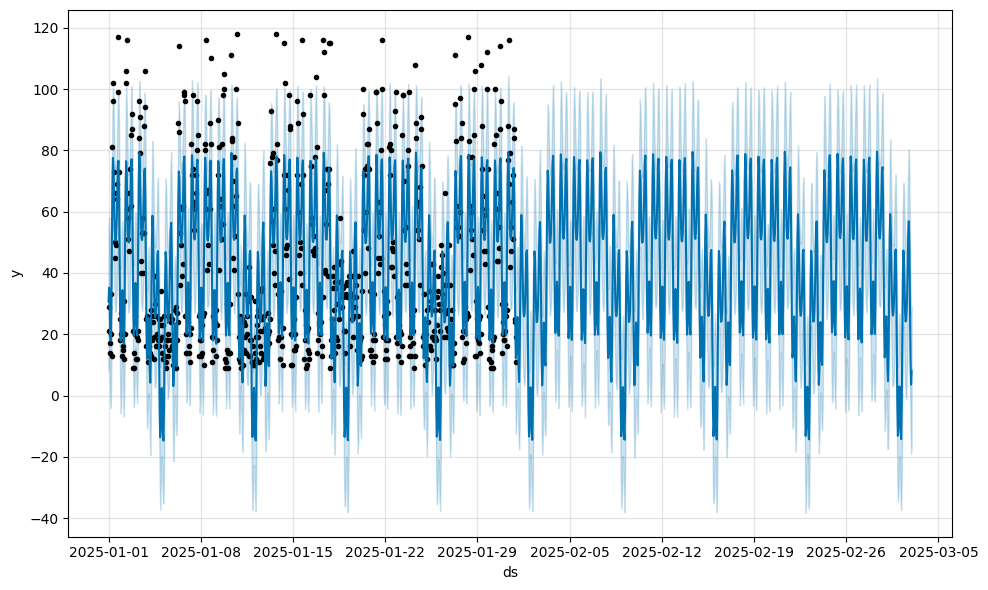

In [11]:
# 予測の実行
forecast = model.predict(future)

# 予測結果の可視化
import matplotlib.pyplot as plt
fig = model.plot(forecast)
plt.show()

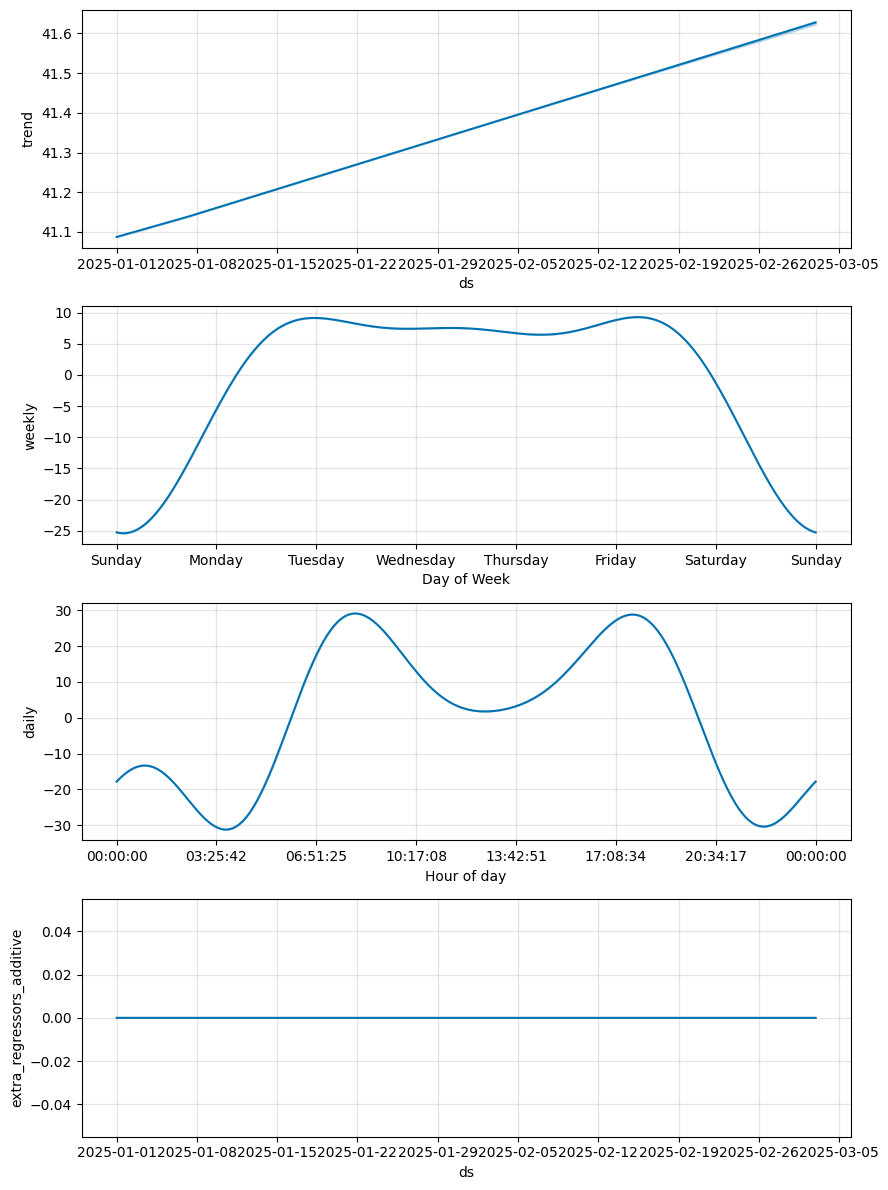

In [12]:
#外部変数の寄与度の確認
fig = model.plot_components(forecast)
plt.show()
